In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os, sys
import warnings
%matplotlib inline

In [38]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/VisaRegime1.csv")

In [39]:
df

,Country,Diplomatic_passport,Service_passport,Civil_passport
0,Abkhazia,Visa-free (up to 90 days),Visa-free (up to 90 days),Visa-free (up to 90 days)
1,Australia,Visa,Visa,Visa
2,Austria,Visa-free (up to 90 days within 180 days),Visa,Visa
3,Azerbaijan,visa-free,visa-free,visa-free
4,Albania,Visa-free (up to 90 days),Visa-free (up to 90 days),Visa
...,...,...,...,...
191,South Africa,Visa-free (up to 90 days),Visa-free (up to 90 days),Visa-free (up to 90 days)
192,South Ossetia,visa-free,visa-free,visa-free
193,South Sudan,Visa,Visa,Visa
194,Jamaica,Visa-free (up to 90 days),Visa-free (up to 90 days),Visa-free (up to 30 days)


In [40]:
df.isnull().sum()

Country                0
Diplomatic_passport    0
Service_passport       0
Civil_passport         0
dtype: int64

In [41]:
# Get unique count for each variable
df.nunique()

Country                196
Diplomatic_passport     14
Service_passport        14
Civil_passport          17
dtype: int64

In [42]:
#information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Country              196 non-null    object
 1   Diplomatic_passport  196 non-null    object
 2   Service_passport     196 non-null    object
 3   Civil_passport       196 non-null    object
dtypes: object(4)
memory usage: 6.2+ KB


In [43]:
# Deleting Country feature as its irrelevant for analysis
df = df.drop("Country", axis=1)

In [44]:
df

,Diplomatic_passport,Service_passport,Civil_passport
0,Visa-free (up to 90 days),Visa-free (up to 90 days),Visa-free (up to 90 days)
1,Visa,Visa,Visa
2,Visa-free (up to 90 days within 180 days),Visa,Visa
3,visa-free,visa-free,visa-free
4,Visa-free (up to 90 days),Visa-free (up to 90 days),Visa
...,...,...,...
191,Visa-free (up to 90 days),Visa-free (up to 90 days),Visa-free (up to 90 days)
192,visa-free,visa-free,visa-free
193,Visa,Visa,Visa
194,Visa-free (up to 90 days),Visa-free (up to 90 days),Visa-free (up to 30 days)


In [45]:
df.Diplomatic_passport.value_counts()

Visa                                                                    60
Visa-free (up to 90 days)                                               47
Visa-free (up to 90 days within 180 days)                               45
visa-free                                                               15
Visa-free (up to 30 days)                                               15
Visa-free (up to 14 days)                                                4
Visa-free (up to 3 months with the right to multiple entry and exit)     2
Visa-free (up to 90 days with the right to multiple entry and exit)      2
Visa-free (within 1 year)                                                1
Visa-free up to 60 days (no more than 90 days within 180 days)           1
Visa-free (up to 1 month)                                                1
Visa-free up to 30 days (no more than 90 days within 180 days)           1
Visa-free (up to 60 days)                                                1
Visa-free (up to 90 days 

In [46]:
df.Service_passport.value_counts()

Visa                                                                    88
Visa-free (up to 90 days)                                               42
Visa-free (up to 90 days within 180 days)                               22
visa-free                                                               15
Visa-free (up to 30 days)                                               15
Visa-free (up to 14 days)                                                4
Visa-free (up to 3 months with the right to multiple entry and exit)     2
Visa-free (up to 90 days with the right to multiple entry and exit)      2
Visa-free (within 1 year)                                                1
Visa-free up to 60 days (no more than 90 days within 180 days)           1
Visa-free up to 1 month)                                                 1
Visa-free up to 30 days (no more than 90 days within 180 days)           1
Visa-free (up to 60 days)                                                1
Visa-free (up to 90 days 

In [47]:
df.Civil_passport.value_counts()

Visa                                                              123
Visa-free (up to 30 days)                                          18
Visa-free (up to 90 days within 180 days)                          15
Visa-free (up to 90 days)                                          13
visa-free                                                          11
Visa-free (up to 14 days)                                           3
Visa-free (up to 180 days)                                          2
Visa-free (up to 60 days)                                           2
Visa-free (no more than 90 days within 180 days)                    1
Visa-free (up to 30 days within 60 days)                            1
Visa-free (up to 15 days)                                           1
Visa-free (within 1 year)                                           1
Visa-free (up to 21 days)                                           1
Visa-free up to 60 days (no more than 90 days within 180 days)      1
Visa-free (up to 1 m

In [48]:
# Mapping Diplomatic_passport to Integer
Diplomatic_passport = {'Visa': 0,                                                                    
'Visa-free (up to 90 days)' :1,                                               
'Visa-free (up to 90 days within 180 days)':2,                              
'visa-free':3,                                                              
'Visa-free (up to 30 days)':4,                                             
'Visa-free (up to 14 days)':5,                                              
'Visa-free (up to 3 months with the right to multiple entry and exit)':6,     
'Visa-free (up to 90 days with the right to multiple entry and exit)':7,  
'Visa-free (within 1 year)':8,                                                
'Visa-free up to 60 days (no more than 90 days within 180 days)':9,          
'Visa-free (up to 1 month)':10,                                               
'Visa-free up to 30 days (no more than 90 days within 180 days)':11,           
'Visa-free (up to 60 days)':12,                                             
'Visa-free (up to 90 days within 6 months)' :13} 
df.Diplomatic_passport = [Diplomatic_passport[item] for item in df.Diplomatic_passport]

In [49]:
# Mapping Service_passport to Integer
Service_passport = {'Visa' : 0,
'Visa-free (up to 90 days)' :1,                                             
'Visa-free (up to 90 days within 180 days)' :2,                              
'visa-free' :3,                                                             
'Visa-free (up to 30 days)' :4,                                               
'Visa-free (up to 14 days)'  :5,                                              
'Visa-free (up to 3 months with the right to multiple entry and exit)' :6,     
'Visa-free (up to 90 days with the right to multiple entry and exit)'  :7,    
'Visa-free (within 1 year)'  :8,                                              
'Visa-free up to 60 days (no more than 90 days within 180 days)' :9,          
'Visa-free up to 1 month)'    :10,                                             
'Visa-free up to 30 days (no more than 90 days within 180 days)'   :11,        
'Visa-free (up to 60 days)'   :12,                                     
'Visa-free (up to 90 days within 6 months)' :13} 
df.Service_passport = [Service_passport[item] for item in df.Service_passport]

In [50]:
# Mapping Civil_passport to Integer
Civil_passport = {'Visa'                                             :0,
'Visa-free (up to 30 days)'                                          :1,
'Visa-free (up to 90 days within 180 days)'                          :2,
'Visa-free (up to 90 days)'                                         :3,
'visa-free'                                                          :4,
'Visa-free (up to 14 days)'                                           :5,
'Visa-free (up to 180 days)'                                          :6,
'Visa-free (up to 60 days)'                                         :7,
'Visa-free (no more than 90 days within 180 days)'                   :8,
'Visa-free (up to 30 days within 60 days)'                           :9,
'Visa-free (up to 15 days)'                                          :10,
'Visa-free (within 1 year)'                                          :11,
'Visa-free (up to 21 days)'                                          :12,
'Visa-free up to 60 days (no more than 90 days within 180 days)'    :13,
'Visa-free (up to 1 month)'                                          :14,
'Visa-free up to 30 days (no more than 90 days within 180 days)'      :15,
'Visa-free (up to 60 days within 180 days)' :16} 
df.Civil_passport = [Civil_passport[item] for item in df.Civil_passport]

In [53]:
df

,Diplomatic_passport,Service_passport,Civil_passport
0,1,1,3
1,0,0,0
2,2,0,0
3,3,3,4
4,1,1,0
...,...,...,...
191,1,1,3
192,3,3,4
193,0,0,0
194,1,1,1


In [54]:
x=df.iloc[:,0:2].values
y=df.iloc[:,2].values

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
# Splitting Features from 
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=0)

In [61]:
x

array([[ 1,  1],
       [ 0,  0],
       [ 2,  0],
       [ 3,  3],
       [ 1,  1],
       [ 0,  0],
       [ 1,  1],
       [ 0,  0],
       [ 4,  4],
       [ 1,  1],
       [ 3,  3],
       [ 0,  0],
       [ 1,  1],
       [ 4,  4],
       [ 3,  3],
       [ 2,  2],
       [ 0,  0],
       [ 3,  3],
       [ 2,  0],
       [ 1,  1],
       [ 2,  2],
       [ 6,  6],
       [ 1,  1],
       [ 1,  1],
       [ 1,  1],
       [ 5,  5],
       [ 1,  1],
       [ 0,  0],
       [ 0,  0],
       [ 1,  1],
       [ 1,  0],
       [ 0,  0],
       [ 2,  2],
       [ 2,  2],
       [ 0,  0],
       [ 1,  1],
       [ 1,  1],
       [ 3,  3],
       [ 2,  2],
       [ 0,  0],
       [ 0,  0],
       [ 2,  2],
       [ 1,  1],
       [ 0,  0],
       [ 2,  0],
       [ 2,  2],
       [ 2,  2],
       [ 2,  0],
       [ 8,  8],
       [ 2,  0],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [ 1,  1],
       [ 1,  1],
       [ 0,  0],
       [ 3,  3],
       [ 0,  0],
       [ 1,  1

In [62]:
y

array([ 3,  0,  0,  4,  0,  0,  0,  0,  1,  6,  4,  0,  3,  0,  4,  0,  0,
        4,  0,  0,  0,  8,  9,  1,  3,  5,  0,  0,  0,  3,  0,  0,  0,  2,
        0, 10,  0,  0,  2,  0,  0,  2,  0,  0,  0,  2,  2,  0, 11,  0,  0,
        0, 12,  1,  0,  0,  0,  2,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  4,  0,  0,  0,  0,  0,  0,  4,  0,  0,  5,  1,  2,  0,  0,  0,
        7,  1,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0, 13,  0,  0,
        3,  0,  1,  0, 14,  0,  3,  6,  1,  0,  4,  0, 15,  0,  3,  5,  0,
        0,  0,  0,  3,  0,  0,  0,  0,  0,  0,  0,  2,  0,  2,  2,  0,  0,
        0,  0,  3,  7,  0,  0,  0,  1,  1,  0,  1,  2,  4,  1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  4,  1,  0,  0,  0,  3,  0,  3,  0, 16,  0,
        4,  2,  2,  3,  1,  0,  0,  0,  0,  0,  1,  0,  2,  0,  0,  0,  2,
        0,  0,  0,  0,  3,  4,  0,  1,  0])

In [63]:
# Import Library
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [64]:
clf = LogisticRegression()
clf.fit(x_train, y_train)
pred = clf.predict(x_test)
print("Logistic Regression : {}%".format(accuracy_score(pred,y_test)*100))

Logistic Regression : 70.0%


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [65]:
# Import Library
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(x_train, y_train)
pred = clf.predict(x_test)
accuracy_score(pred, y_test)
print("Decision Tree : {}%".format(accuracy_score(pred,y_test)*100))

Decision Tree : 75.0%


In [66]:
# Import Library
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 200, random_state=200)
clf.fit(x_train, y_train)
pred = clf.predict(x_test)
print("Random Forest Model : {:.2f}%".format(accuracy_score(pred,y_test)*100))

Random Forest Model : 75.00%


In [67]:
confusion_matrix(y_test, pred)

array([[24,  0,  2,  0,  2,  0,  0,  0],
       [ 1,  2,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  3,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  0]])

In [68]:
#Feature Scaling using sklearn Preprocessing Module
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [69]:
#X_train
x_test

array([[-0.38402671, -0.27184367],
       [-0.38402671, -0.27184367],
       [ 0.05973749,  0.15651605],
       [-0.82779091, -0.70020339],
       [ 0.05973749,  0.15651605],
       [ 0.05973749, -0.70020339],
       [-0.82779091, -0.70020339],
       [ 0.05973749, -0.70020339],
       [-0.82779091, -0.70020339],
       [ 0.05973749, -0.70020339],
       [-0.82779091, -0.70020339],
       [-0.82779091, -0.70020339],
       [-0.38402671, -0.70020339],
       [-0.82779091, -0.70020339],
       [ 0.50350168,  0.58487577],
       [ 0.05973749, -0.70020339],
       [-0.82779091, -0.70020339],
       [ 0.05973749,  0.15651605],
       [ 0.05973749, -0.70020339],
       [-0.82779091, -0.70020339],
       [ 0.50350168,  0.58487577],
       [-0.38402671, -0.27184367],
       [-0.82779091, -0.70020339],
       [ 0.05973749,  0.15651605],
       [-0.82779091, -0.70020339],
       [-0.82779091, -0.70020339],
       [ 0.94726588,  1.01323549],
       [-0.38402671, -0.27184367],
       [ 0.05973749,

In [70]:
# Import Library
from sklearn.svm import SVC  #Support Vector Classification module

In [71]:
svclassifier = SVC(kernel='linear')  
svclassifier.fit(x_train, y_train)  #Train data

SVC(kernel='linear')

In [72]:
#Making Prediction
y_pred = svclassifier.predict(x_test)

In [73]:
print("Support Vector Classifier : {:.2f}%".format(accuracy_score(pred,y_test)*100))

Support Vector Classifier : 75.00%


In [74]:
# Import Library
from sklearn.neighbors import KNeighborsClassifier

In [75]:
knnclassifier = KNeighborsClassifier()
knnclassifier.fit(x_train, y_train)  #Train data

KNeighborsClassifier()

In [76]:
#Making Prediction
y_pred = knnclassifier.predict(x_test)

In [77]:
print("K-Nearest Neighbour Classifier : {:.2f}%".format(accuracy_score(pred,y_test)*100))

K-Nearest Neighbour Classifier : 75.00%


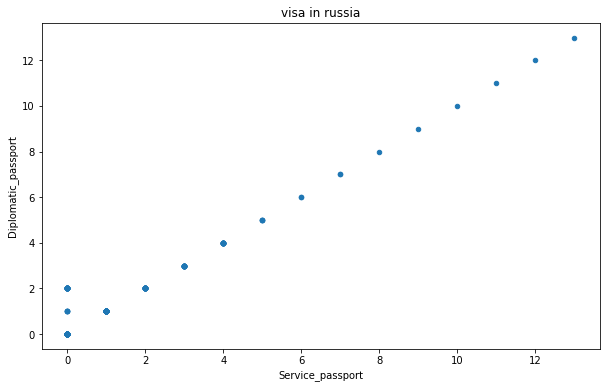

In [79]:
df.plot(x='Service_passport', y='Diplomatic_passport', kind='scatter',
        figsize=(10,6),
        title='visa in russia')

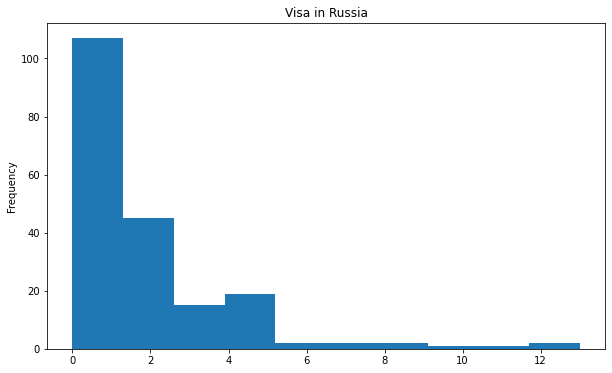

In [81]:
df['Diplomatic_passport'].plot(kind='hist', figsize=(10,6), title='Visa in Russia')

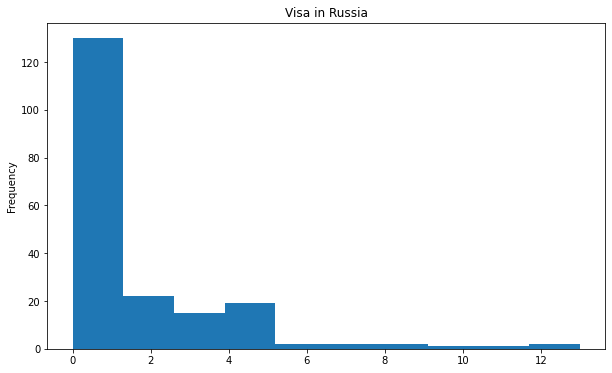

In [80]:
df['Service_passport'].plot(kind='hist', figsize=(10,6), title='Visa in Russia')

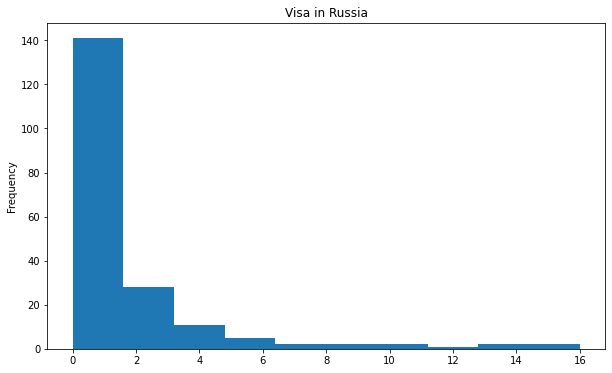

In [82]:
df['Civil_passport'].plot(kind='hist', figsize=(10,6), title='Visa in Russia')

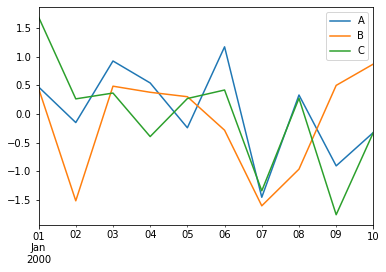

In [87]:
df = pd.DataFrame(np.random.randn(10,3),index=pd.date_range('1/1/2000',
   periods=10), columns=list('ABC'))
df.plot()
#Diplomatic_passport=A
#Service_passport=B
#Civil_passport=c

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f773a29b050>],
      dtype=object)

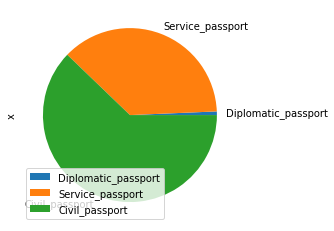

In [85]:
df = pd.DataFrame(3 * np.random.rand(3), index=['Diplomatic_passport', 'Service_passport', 'Civil_passport'], columns=['x'])
df.plot.pie(subplots=True)

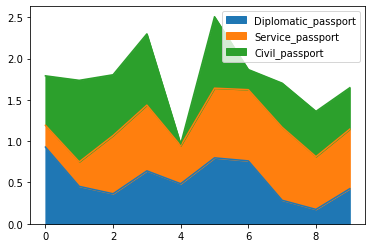

In [88]:
df = pd.DataFrame(np.random.rand(10, 3), columns=['Diplomatic_passport', 'Service_passport', 'Civil_passport'])
df.plot.area()

In [ ]:
                        #Thank You#